In [1]:
from premise import *
import bw2data, bw2calc
import pandas as pd
bw2data.projects.set_current("ei39")

In [ ]:
startwith = [
    "electricity production",
    "heat and power"
]
unit = "kilowatt hour"
undesired = []

In [3]:
startwith = [
    "hydrogen production",
]
unit = "kilogram"
undesired = []

In [43]:
startwith = [
    "diesel production",
    "biodiesel production",
    "gasoline production",
    "ethanol production",
    "methanol production",
]
unit = "kilogram"

undesired = [
    "distiller",
    "electricity",
    "bagasse",
    "fodder",
    "protein",
    "pulp",
    "fibre"
]

In [44]:
FU = [
    {a: 1} for a in
    bw2data.Database("test13")
    if any(a["name"].startswith(x) for x in startwith) and a["unit"] == unit
    and "fuelling station" not in a["name"] and not any(
        i.lower() in a["reference product"].lower()
        for i in undesired
    )
]

print(len(FU))

list_meth = [
    ('IPCC 2021', 'climate change', 'GWP 100a, incl. H'),
    ('IPCC 2021', 'climate change', 'GWP 100a, incl. H and bio CO2'),
    ('selected LCI results', 'resource', 'land occupation'),
    ('EN15804', 'inventory indicators ISO21930', 'use of net fresh water'),
    ('Cumulative Energy Demand (CED)', 'total', 'energy content (HHV)'),
    ('USEtox', 'ecotoxicity', 'total')
]
import bw2calc
bw2data.calculation_setups['multiLCA'] = {'inv': FU, 'ia': list_meth}
myMultiLCA = bw2calc.MultiLCA('multiLCA')

138


/opt/homebrew/Caskroom/miniforge/base/envs/ab/lib/python3.9/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.04e+12)
  warnings.warn(msg, UmfpackWarning)


In [45]:
df = pd.DataFrame(columns = [", ".join(i) for i in list_meth],
     data = myMultiLCA.results,
     index=[k["name"] + ", " + k["location"] for i in FU for k in i]
)

In [46]:
df.index = df.index.str.replace("electricity production, ", "")
df.index = df.index.str.replace("heat and power co-generation, ", "CHP,")
df = df.sort_index()

In [47]:
df.columns=["GWP", "GWP + bio", "land", "water", "energy", "tox"]

In [48]:
mapping = pd.read_excel("mapping.xlsx", index_col=0)
mapping=mapping.to_dict("index")

In [49]:
mapping={k: list(v.values())[0] for k, v in mapping.items()}

In [50]:
df["type"]=df.index.map(mapping)

In [51]:
df.to_excel("fuels.xlsx")

In [52]:
df.head()

,GWP,GWP + bio,land,water,energy,tox,type
"biodiesel production, via Fischer-Tropsch, from forest product (non-residual), energy allocation, RER",0.268782,-2.759367,3.694172,0.005335,28.541440,2.006443,Biodiesel
"biodiesel production, via Fischer-Tropsch, from forest residues, energy allocation, RER",0.771882,-2.080826,0.100928,0.002385,83.429394,3.391129,Biodiesel
"biodiesel production, via transesterification, from algae, energy allocation, RER",2.019187,-0.832271,0.129457,0.146644,78.364675,10.581377,Biodiesel
"biodiesel production, via transesterification, from palm oil, energy allocation, ID",1.967085,-0.886085,1.960507,0.065153,87.683350,11.359821,Biodiesel
"biodiesel production, via transesterification, from rapeseed oil, energy allocation, RER",2.662846,-0.238922,8.288387,0.510640,88.489344,33.698044,Biodiesel


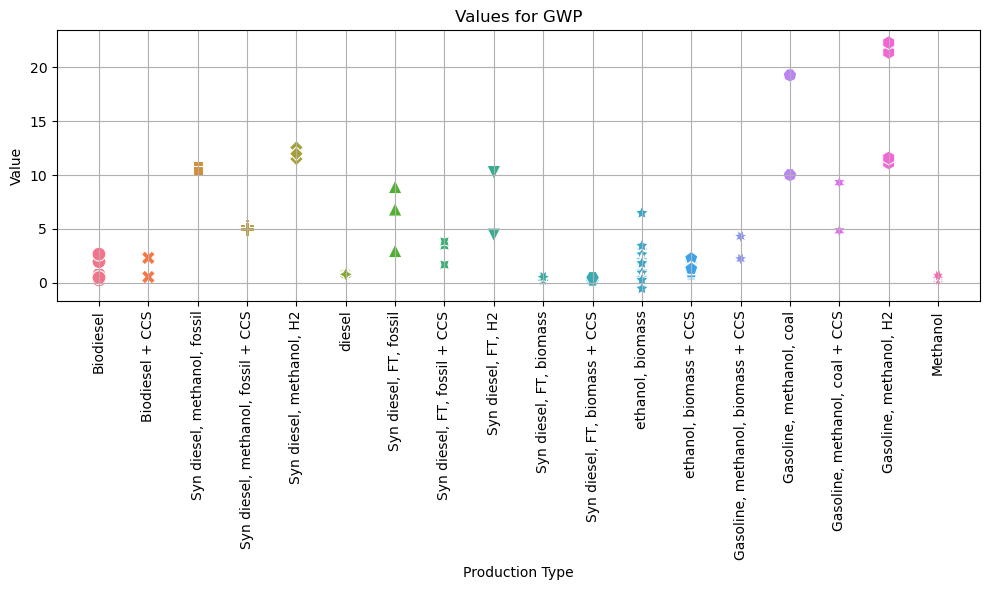

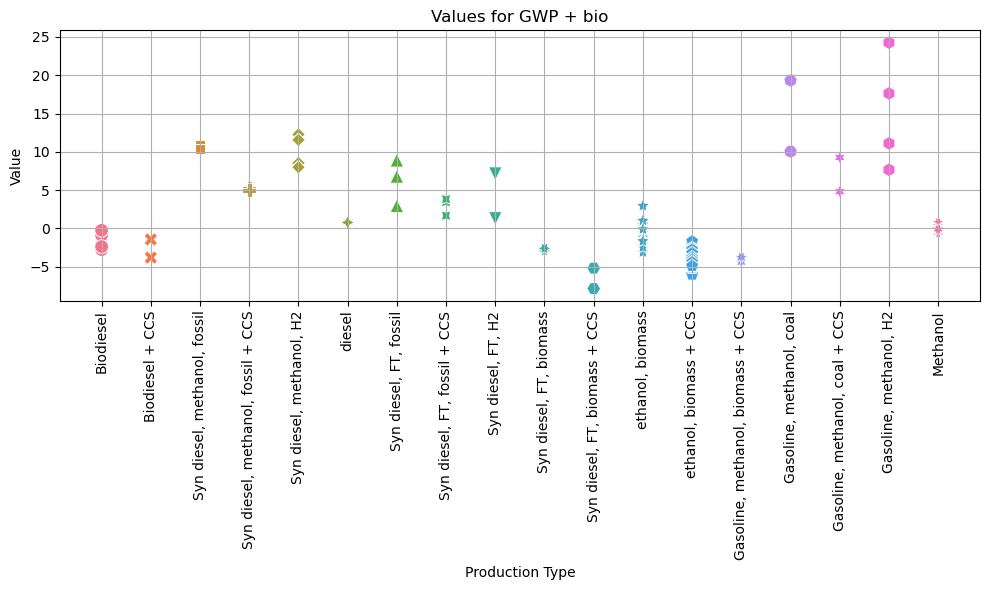

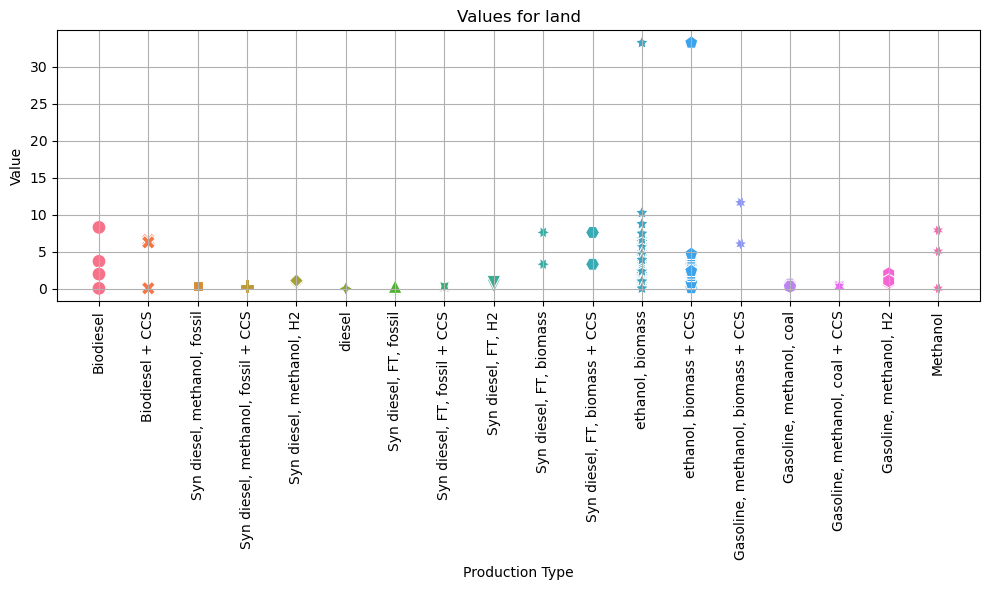

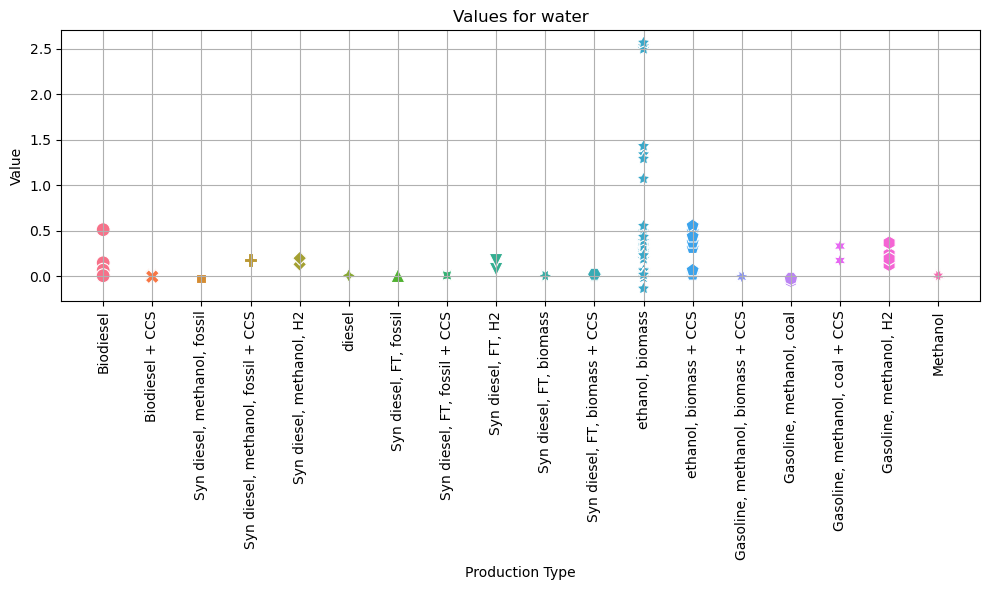

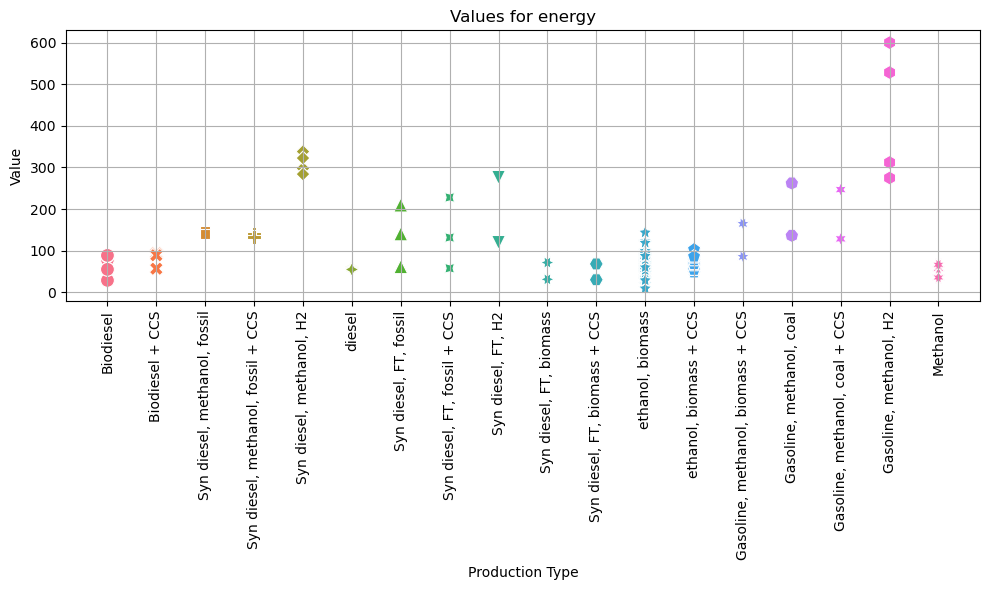

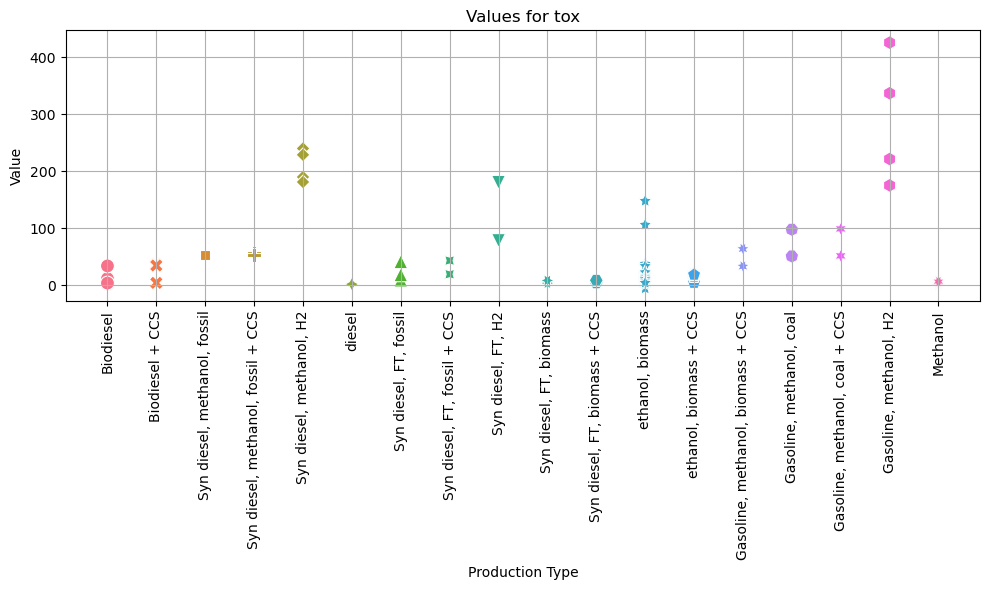

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Impact categories (excluding the first 'Unnamed' and last 'type' columns)
impact_categories = df.columns[0:-1]

# Plotting
for impact_category in impact_categories:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='type', y=impact_category, hue='type', style='type', s=100)
    plt.title(f'Values for {impact_category}')
    plt.ylabel('Value')
    plt.xlabel('Production Type')
    plt.xticks(rotation=90)
    plt.grid()

    if impact_category in ["GWP", "GWP + bio", "land"]:
        plt.ylim(None, None)
    #plt.legend(title='Production Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend().remove()
    plt.tight_layout()
    plt.show()


In [88]:
outliers_df_with_deviation.to_excel("outliers.xlsx")